In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
pd.options.mode.chained_assignment = None
from sklearn.preprocessing import LabelEncoder

In [2]:
import seaborn as sns
import plotly.graph_objects as go 
import matplotlib.pyplot as plt

Use the online sports gaming data set to perform data analysis and determine preliminary features

In [3]:
df_raw = pd.read_csv('Online_sports_DIB.csv')

Do basic data gathering in the df
1. ReqTimeUTC is type obj so convert to datetime
2. 4 columns are 447853 but Status is only 447847 - find out why
3. Shorten up the column titles to something more manageable
4. The data period ends 2020-02-29 exclude any lines past that date and there are some
5. Re-code the Transaction type into shorter and meaningful length
6. Strip of 'customer' from the user column leaving only the customer number


In [4]:
df = df_raw.copy()

In [5]:
df.head()

,ReqTimeUTC,TransactionType,TransactionAmount,Status,AccountIdentifier
0,2019-12-01T09:29:45+0000,LOYALTYCARDCREDITACH,25.75,APPROVED,customer1607
1,2020-01-14T08:04:28+0000,LOYALTYCARDCREDITACH,103.00,APPROVED,customer1607
2,2019-11-07T14:43:36+0000,LOYALTYCARDCREDITACH,20.60,APPROVED,customer1607
3,2020-01-12T08:30:57+0000,LOYALTYCARDCREDITACH,25.75,APPROVED,customer1607
4,2020-02-09T06:30:15+0000,LOYALTYCARDCREDITACH,54.58,APPROVED,customer1607


In [6]:
df.dtypes

ReqTimeUTC            object
TransactionType       object
TransactionAmount    float64
Status                object
AccountIdentifier     object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447853 entries, 0 to 447852
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ReqTimeUTC         447853 non-null  object 
 1   TransactionType    447853 non-null  object 
 2   TransactionAmount  447853 non-null  float64
 3   Status             447847 non-null  object 
 4   AccountIdentifier  447853 non-null  object 
dtypes: float64(1), object(4)
memory usage: 17.1+ MB


In [8]:
df.describe()

,TransactionAmount
count,447853.000000
mean,114.886392
std,1320.373240
min,0.010000
25%,15.440000
50%,38.000000
75%,100.000000
max,545700.000000


In [9]:
df.describe(include='O')

,ReqTimeUTC,TransactionType,Status,AccountIdentifier
count,447853,447853,447847,447853
unique,440021,4,2,5685
top,2020-01-09T10:28:59+0000,LOYALTYCARDDEBIT,APPROVED,customer40
freq,6,219715,436908,3662


In [10]:
# Change dtype

df.ReqTimeUTC = pd.to_datetime(df.ReqTimeUTC)
df.dtypes

ReqTimeUTC           datetime64[ns, UTC]
TransactionType                   object
TransactionAmount                float64
Status                            object
AccountIdentifier                 object
dtype: object

In [11]:
# Remove dates after end of Feb

df = df[df.ReqTimeUTC <= '2020-02-29 00:00:00+00:00'].copy()
df.head()

,ReqTimeUTC,TransactionType,TransactionAmount,Status,AccountIdentifier
0,2019-12-01 09:29:45+00:00,LOYALTYCARDCREDITACH,25.75,APPROVED,customer1607
1,2020-01-14 08:04:28+00:00,LOYALTYCARDCREDITACH,103.00,APPROVED,customer1607
2,2019-11-07 14:43:36+00:00,LOYALTYCARDCREDITACH,20.60,APPROVED,customer1607
3,2020-01-12 08:30:57+00:00,LOYALTYCARDCREDITACH,25.75,APPROVED,customer1607
4,2020-02-09 06:30:15+00:00,LOYALTYCARDCREDITACH,54.58,APPROVED,customer1607


In [12]:
#find missing entries in Status

missing_entries = df[df['Status'].isna()]
print(missing_entries)

                     ReqTimeUTC      TransactionType  TransactionAmount  \
18552 2020-01-09 10:28:59+00:00  LOYALTYCARDCREDITCL              103.0   
18593 2020-01-09 10:28:59+00:00  LOYALTYCARDCREDITCL              103.0   
18608 2020-01-09 10:28:59+00:00  LOYALTYCARDCREDITCL              103.0   
18620 2020-01-09 10:28:59+00:00  LOYALTYCARDCREDITCL              103.0   
18621 2020-01-09 10:28:59+00:00  LOYALTYCARDCREDITCL              103.0   
18622 2020-01-09 10:28:59+00:00  LOYALTYCARDCREDITCL              103.0   

      Status AccountIdentifier  
18552    NaN      customer1191  
18593    NaN      customer1191  
18608    NaN      customer1191  
18620    NaN      customer1191  
18621    NaN      customer1191  
18622    NaN      customer1191  


In [13]:
# Drop rows with missing values in 'your_column'
df = df.dropna(subset=['Status'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 443186 entries, 0 to 447852
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   ReqTimeUTC         443186 non-null  datetime64[ns, UTC]
 1   TransactionType    443186 non-null  object             
 2   TransactionAmount  443186 non-null  float64            
 3   Status             443186 non-null  object             
 4   AccountIdentifier  443186 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), object(3)
memory usage: 20.3+ MB


In [14]:
df.TransactionType.unique()

array(['LOYALTYCARDCREDITACH', 'LOYALTYCARDDEBIT', 'LOYALTYCARDCREDITCL',
       'LOYALTYCARDCREDIT'], dtype=object)

Mapping for TransactionType 
LOYALTYCARDCREDITACH: L1D, LOYALTYCARDCREDITCL: L1D,
LOYALTYCARDDEBIT: L2D,  LOYALTYCARDCREDIT: L2W

In [15]:
df.TransactionType = df.TransactionType.map({'LOYALTYCARDCREDITACH':'L1D', 'LOYALTYCARDCREDITCL':'L1D',
'LOYALTYCARDDEBIT':'L2D', 'LOYALTYCARDCREDIT':'L2W'})

df

,ReqTimeUTC,TransactionType,TransactionAmount,Status,AccountIdentifier
0,2019-12-01 09:29:45+00:00,L1D,25.75,APPROVED,customer1607
1,2020-01-14 08:04:28+00:00,L1D,103.00,APPROVED,customer1607
2,2019-11-07 14:43:36+00:00,L1D,20.60,APPROVED,customer1607
3,2020-01-12 08:30:57+00:00,L1D,25.75,APPROVED,customer1607
4,2020-02-09 06:30:15+00:00,L1D,54.58,APPROVED,customer1607
...,...,...,...,...,...
447848,2020-01-13 05:37:35+00:00,L1D,20.60,APPROVED,customer3787
447849,2019-12-22 07:07:35+00:00,L2D,25.00,APPROVED,customer3787
447850,2019-12-22 07:04:58+00:00,L1D,25.75,APPROVED,customer3787
447851,2020-01-17 00:05:35+00:00,L2D,25.00,APPROVED,customer3787


In [16]:
# Rename the columns

df.rename(columns= {'AccountIdentifier':'user', 'ReqTimeUTC':'date', 'Status':'status',
                     'TransactionType':'type', 'TransactionAmount':'amount'}, inplace=True)

df

,date,type,amount,status,user
0,2019-12-01 09:29:45+00:00,L1D,25.75,APPROVED,customer1607
1,2020-01-14 08:04:28+00:00,L1D,103.00,APPROVED,customer1607
2,2019-11-07 14:43:36+00:00,L1D,20.60,APPROVED,customer1607
3,2020-01-12 08:30:57+00:00,L1D,25.75,APPROVED,customer1607
4,2020-02-09 06:30:15+00:00,L1D,54.58,APPROVED,customer1607
...,...,...,...,...,...
447848,2020-01-13 05:37:35+00:00,L1D,20.60,APPROVED,customer3787
447849,2019-12-22 07:07:35+00:00,L2D,25.00,APPROVED,customer3787
447850,2019-12-22 07:04:58+00:00,L1D,25.75,APPROVED,customer3787
447851,2020-01-17 00:05:35+00:00,L2D,25.00,APPROVED,customer3787


In [17]:
# Strip off the 'Customer' prefix in the user column. Leave just the id number

df['user'] = df['user'].str.replace('customer', '', regex=True)

df

,date,type,amount,status,user
0,2019-12-01 09:29:45+00:00,L1D,25.75,APPROVED,1607
1,2020-01-14 08:04:28+00:00,L1D,103.00,APPROVED,1607
2,2019-11-07 14:43:36+00:00,L1D,20.60,APPROVED,1607
3,2020-01-12 08:30:57+00:00,L1D,25.75,APPROVED,1607
4,2020-02-09 06:30:15+00:00,L1D,54.58,APPROVED,1607
...,...,...,...,...,...
447848,2020-01-13 05:37:35+00:00,L1D,20.60,APPROVED,3787
447849,2019-12-22 07:07:35+00:00,L2D,25.00,APPROVED,3787
447850,2019-12-22 07:04:58+00:00,L1D,25.75,APPROVED,3787
447851,2020-01-17 00:05:35+00:00,L2D,25.00,APPROVED,3787


In [18]:
# Group the df by user and type to see what we've got

In [19]:
df.groupby(['user', 'type']).count().reset_index()

,user,type,date,amount,status
0,1,L1D,102,102,102
1,1,L2D,102,102,102
2,1,L2W,2,2,2
3,10,L1D,382,382,382
4,10,L2D,386,386,386
...,...,...,...,...,...
12882,998,L1D,8,8,8
12883,998,L2D,8,8,8
12884,999,L1D,168,168,168
12885,999,L2D,164,164,164


In [20]:
user_type_ =df.groupby(['user', 'type']).count().reset_index()

Plot the result using a cumulative 

<Axes: xlabel='date', ylabel='Density'>

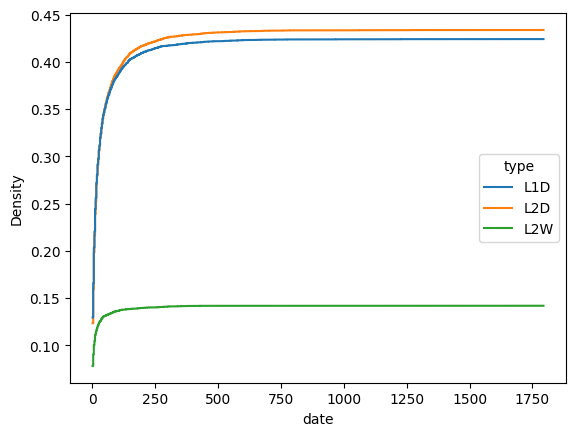

In [21]:
sns.histplot(data=user_type_, x='date', hue='type',
             cumulative=True, stat='density',
             element='step', fill=False)

As for the casino data the L1D and L2D map closely together and the L2W plot is closer than the casino plot
but still not useful.
Drop the L1D data and keep the L1D APPROVED data for analysis

In [22]:
df_working = df.copy()
df_working.head(2)

,date,type,amount,status,user
0,2019-12-01 09:29:45+00:00,L1D,25.75,APPROVED,1607
1,2020-01-14 08:04:28+00:00,L1D,103.00,APPROVED,1607


In [23]:
df_working = df_working[(df_working['type'] == 'L2D') & \
                        (df_working['status'] == 'APPROVED')].reset_index(drop=True)
df_working.head(2)

,date,type,amount,status,user
0,2020-01-12 08:31:34+00:00,L2D,25.0,APPROVED,1607
1,2019-11-07 14:44:21+00:00,L2D,20.0,APPROVED,1607


In [24]:
df_working = df_working[['user', 'date', 'type', 'amount']]
df_working = df_working.sort_values(['user', 'date']) \
.reset_index(drop=True)

df_working.head()

,user,date,type,amount
0,1,2019-03-01 08:47:07+00:00,L2D,97.0
1,1,2019-03-01 11:21:31+00:00,L2D,97.0
2,1,2019-03-02 07:36:10+00:00,L2D,291.0
3,1,2019-03-05 07:49:28+00:00,L2D,145.5
4,1,2019-03-05 09:58:21+00:00,L2D,58.2


Find the top 20 dollar depositors and the top most frequent depositors
1. get a frequency count
2. reset indices
3. select first 2 cols
4. sort by date, reverse the sort and take top 20 values
5. put the top 20 in a new df and clean it up

In [25]:
df_working.groupby('user').count()

,date,type,amount
user,,,
1,102,102,102
10,383,383,383
100,106,106,106
1000,142,142,142
1001,45,45,45
...,...,...,...
995,86,86,86
996,372,372,372
997,106,106,106


In [26]:
df_working.groupby('user').count().reset_index()

,user,date,type,amount
0,1,102,102,102
1,10,383,383,383
2,100,106,106,106
3,1000,142,142,142
4,1001,45,45,45
...,...,...,...,...
5567,995,86,86,86
5568,996,372,372,372
5569,997,106,106,106
5570,998,8,8,8


In [27]:
# add iloc :=all rows, 0:2 cols 0 and 1 to isolate user and date

df_working.groupby('user').count().reset_index()\
    .iloc[:,0:2]


,user,date
0,1,102
1,10,383
2,100,106
3,1000,142
4,1001,45
...,...,...
5567,995,86
5568,996,372
5569,997,106
5570,998,8


In [28]:
# sort the value -1 is high to low, then pick top 20 rows

df_working.groupby('user').count().reset_index()\
    .iloc[:,0:2].sort_values('date')[::-1][0:20]


,user,date
3319,40,1745
1134,202,1261
5195,66,1209
5217,68,1120
1112,200,1061
2575,332,774
4618,52,774
534,148,760
135,112,757
3101,380,682


In [29]:
top_20freq_df = df_working.groupby('user').count().reset_index()\
    .iloc[:,0:2].sort_values('date')[::-1][0:20]

top_20freq_df

,user,date
3319,40,1745
1134,202,1261
5195,66,1209
5217,68,1120
1112,200,1061
2575,332,774
4618,52,774
534,148,760
135,112,757
3101,380,682


Repeat for the top 20 dollar value depositors

In [30]:
top_20dep_df = df_working[['user', 'amount']] \
    .groupby('user').sum().reset_index() \
    .sort_values('amount')[::-1][0:20]

top_20dep_df

,user,amount
357,132,211502.74
319,1286,103276.84
5366,813,102237.55
917,1824,94333.86
1134,202,92685.81
5217,68,90420.55
120,1106,87973.13
3756,44,84311.03
5416,859,81924.22
856,177,73829.85


Plot freq and dep df's side by side to see how they match up

<Axes: xlabel='amount', ylabel='user'>

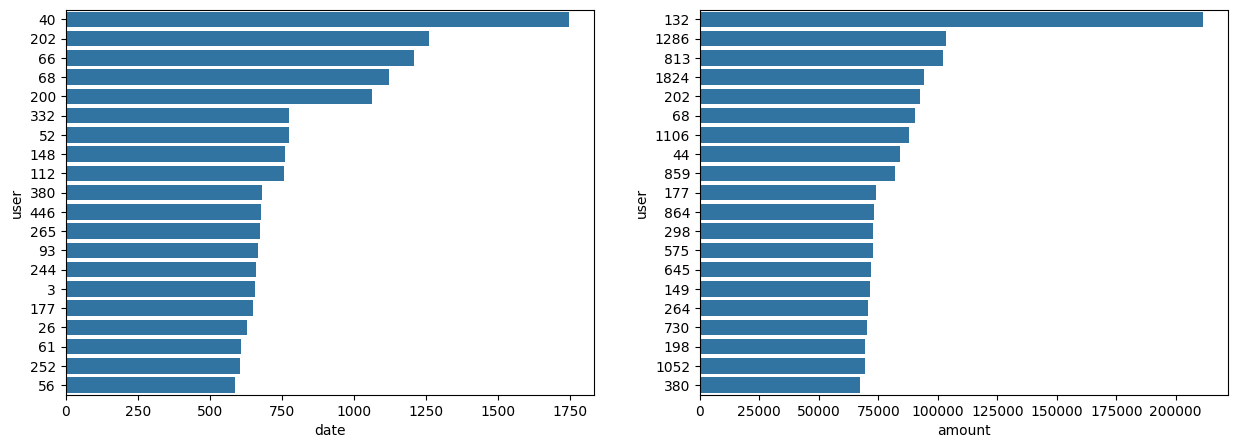

In [31]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))

sns.barplot(top_20freq_df, x='date', y='user',
            ax = ax[0])
sns.barplot(top_20dep_df, x='amount', y='user',
            ax = ax[1])


Use pd.merge to find the common user in both the frequency and deposit value df's and print them out

In [32]:
common_customers = pd.merge(top_20freq_df, top_20dep_df, on='user') 
print(common_customers)

  user  date    amount
0  202  1261  92685.81
1   68  1120  90420.55
2  380   682  67414.62
3  177   648  73829.85


There are only four customers who appear as top-20' on both lists. The suggests that the relationship
between number of deposits and the value of those deposits is not strong

The data contains date/time information on the transactions.
Use this data to see if there is a  disceranble pattern to patron activity using a heatmap

In [33]:
# extract 'hour' from the datetime group

df_working.date.dt.hour
df_working['hour'] = df_working.date.dt.hour

In [34]:
# extract the day of the week

df_working.date.dt.day_of_week
df_working['day_of_week'] = df_working.date.dt \
    .day_of_week

df_working

,user,date,type,amount,hour,day_of_week
0,1,2019-03-01 08:47:07+00:00,L2D,97.0,8,4
1,1,2019-03-01 11:21:31+00:00,L2D,97.0,11,4
2,1,2019-03-02 07:36:10+00:00,L2D,291.0,7,5
3,1,2019-03-05 07:49:28+00:00,L2D,145.5,7,1
4,1,2019-03-05 09:58:21+00:00,L2D,58.2,9,1
...,...,...,...,...,...,...
212786,999,2020-02-23 05:51:36+00:00,L2D,40.0,5,6
212787,999,2020-02-23 07:58:25+00:00,L2D,40.0,7,6
212788,999,2020-02-24 00:38:59+00:00,L2D,60.0,0,0
212789,999,2020-02-24 05:05:11+00:00,L2D,40.0,5,0


In [35]:
# the day of the week is presented as an integer.
#create a dictionary to map names to the integers

day_of_the_week_dict = {0: 'Monday',
                        1: 'Tuesday',
                        2: 'Wednesday',
                        3: 'Thursday',
                        4: 'Friday',
                        5: 'Saturday',
                        6: 'Sunday',
                        }

df_working.day_of_week = df_working['day_of_week']\
    .map(day_of_the_week_dict)

df_working

,user,date,type,amount,hour,day_of_week
0,1,2019-03-01 08:47:07+00:00,L2D,97.0,8,Friday
1,1,2019-03-01 11:21:31+00:00,L2D,97.0,11,Friday
2,1,2019-03-02 07:36:10+00:00,L2D,291.0,7,Saturday
3,1,2019-03-05 07:49:28+00:00,L2D,145.5,7,Tuesday
4,1,2019-03-05 09:58:21+00:00,L2D,58.2,9,Tuesday
...,...,...,...,...,...,...
212786,999,2020-02-23 05:51:36+00:00,L2D,40.0,5,Sunday
212787,999,2020-02-23 07:58:25+00:00,L2D,40.0,7,Sunday
212788,999,2020-02-24 00:38:59+00:00,L2D,60.0,0,Monday
212789,999,2020-02-24 05:05:11+00:00,L2D,40.0,5,Monday


Create the data for the heatmap.
Need a confusion matrix with day of the week as index and hours of the day as the cols.
Panda pivot_table to organize the data

In [36]:
df_working[['hour', 'day_of_week', 'type']] \
.groupby(['hour', 'day_of_week']).count().reset_index()

,hour,day_of_week,type
0,0,Friday,1318
1,0,Monday,3055
2,0,Saturday,1202
3,0,Sunday,3527
4,0,Thursday,1097
...,...,...,...
163,23,Saturday,2256
164,23,Sunday,4188
165,23,Thursday,1430
166,23,Tuesday,647


In [37]:
h_d_g = df_working[['hour', 'day_of_week', 'type']] \
.groupby(['hour', 'day_of_week']).count().reset_index()

h_d_g

,hour,day_of_week,type
0,0,Friday,1318
1,0,Monday,3055
2,0,Saturday,1202
3,0,Sunday,3527
4,0,Thursday,1097
...,...,...,...
163,23,Saturday,2256
164,23,Sunday,4188
165,23,Thursday,1430
166,23,Tuesday,647


In [38]:
df_heatmap = pd.pivot_table(h_d_g, values='type', index='day_of_week',
                                columns='hour')

<Axes: xlabel='hour', ylabel='day_of_week'>

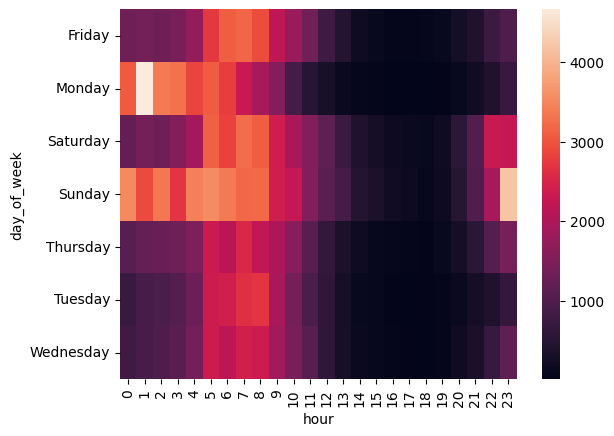

In [39]:
sns.heatmap(df_heatmap)

The heatmap shows that deposit activity is concentrated in the am and diminishes significantly in the pm. 
This is consistent with patrons replenishing their accounts before gaming.

Consider developing the data for a heatmap of L2W to see if that shows similar patterns

We can look at patron daily activity but there are likely gaps that will prevent plotting this.
Confirm on one patron and fill in gaps as necessary

In [40]:
df_working.columns

Index(['user', 'date', 'type', 'amount', 'hour', 'day_of_week'], dtype='object')

In [41]:
daily_activity = df_working.groupby(['user', 'date']) \
.agg({'amount':'sum', 'type':'count'}) \
.reset_index()

daily_activity

,user,date,amount,type
0,1,2019-03-01 08:47:07+00:00,97.0,1
1,1,2019-03-01 11:21:31+00:00,97.0,1
2,1,2019-03-02 07:36:10+00:00,291.0,1
3,1,2019-03-05 07:49:28+00:00,145.5,1
4,1,2019-03-05 09:58:21+00:00,58.2,1
...,...,...,...,...
212785,999,2020-02-23 05:51:36+00:00,40.0,1
212786,999,2020-02-23 07:58:25+00:00,40.0,1
212787,999,2020-02-24 00:38:59+00:00,60.0,1
212788,999,2020-02-24 05:05:11+00:00,40.0,1


In [42]:
# change the digit to whatever patron you want from 0-20

c4 = daily_activity[daily_activity.user == '4'][0:20]
c4

,user,date,amount,type
136262,4,2019-03-04 00:07:10+00:00,10.50,1
136263,4,2019-03-07 07:06:12+00:00,8.73,1
136264,4,2019-03-09 02:46:09+00:00,20.38,1
136265,4,2019-03-12 21:51:34+00:00,20.37,1
136266,4,2019-03-16 00:02:07+00:00,21.34,1
136267,4,2019-03-24 01:29:44+00:00,20.37,1
136268,4,2019-03-26 22:17:52+00:00,20.37,1
136269,4,2019-03-29 06:10:56+00:00,20.37,1
136270,4,2019-03-31 20:54:57+00:00,20.37,1
136271,4,2019-04-03 23:09:11+00:00,6.79,1


Fill the gaps in the dates

In [43]:
full_customer_df = pd.DataFrame()

for customer_id in daily_activity.user.unique():
    customer_df = daily_activity[daily_activity.user == customer_id]

    full_range = pd.date_range(customer_df.date.min(),customer_df.date.max(), freq='D')

    customer_df = customer_df.set_index(keys='date')

    customer_df = customer_df.reindex(list(full_range), fill_value=0)

    customer_df.user = [customer_id] * len(customer_df)

    customer_df = customer_df.reset_index()

    full_customer_df = pd.concat([full_customer_df, customer_df])

full_customer_df = full_customer_df.reset_index(drop=True)

In [44]:
print(full_customer_df.isnull().sum())

date      0
user      0
amount    0
type      0
dtype: int64


Try the Sankey plot again. Lots of checks on the way

In [45]:
full_customer_df['month'] = full_customer_df.date.dt.to_period('M')

/tmp/ipykernel_28723/1411071777.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  full_customer_df['month'] = full_customer_df.date.dt.to_period('M')


In [46]:
customer_month = full_customer_df.groupby(['month', 'user']).count().reset_index().iloc[:, :2]

In [47]:
start_ = customer_month.groupby('user').min().reset_index()

In [48]:
end_ = customer_month.groupby('user').max().reset_index()

In [49]:
start_end_df = pd.merge(start_, end_, on='user')

In [50]:
source_target_value = start_end_df.groupby(['month_x', 'month_y']).count().reset_index()

In [51]:
source_target_value

,month_x,month_y,user
0,2019-03,2019-03,166
1,2019-03,2019-04,71
2,2019-03,2019-05,49
3,2019-03,2019-06,41
4,2019-03,2019-07,30
...,...,...,...
73,2019-12,2020-01,77
74,2019-12,2020-02,181
75,2020-01,2020-01,156
76,2020-01,2020-02,148


Use LabelEncoder to set up the Sankey data

In [52]:
le = LabelEncoder()
le.fit_transform(source_target_value.month_x.unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [53]:
fig = go.Figure(data=[go.Sankey(node=dict(
    pad=100,
    thickness=10,
    line=dict(color = 'gray', width = 0.5),
    label = ['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
            'Oct', 'Nov', 'Dec', 'Jan', 'Feb' ],

    color = 'orange'),
                    link = dict(
                        source = le.transform(source_target_value.month_x.tolist()),
                        target = le.transform(source_target_value.month_y.tolist()),
                        value = source_target_value.user.tolist(),
                        #hovercolor =['black']
                    
))])

fig.update_layout(title_text='Customer Activity: Mar-Feb')

fig.show()

Who in the data exits gaming the quickest

In [54]:
source_target_value

,month_x,month_y,user
0,2019-03,2019-03,166
1,2019-03,2019-04,71
2,2019-03,2019-05,49
3,2019-03,2019-06,41
4,2019-03,2019-07,30
...,...,...,...
73,2019-12,2020-01,77
74,2019-12,2020-02,181
75,2020-01,2020-01,156
76,2020-01,2020-02,148


In [55]:
fast_quiter_ = source_target_value[source_target_value.month_x == source_target_value.month_y]

source_target_value = source_target_value[source_target_value.month_x != source_target_value.month_y]

In [59]:
fast_quiter_

,month_x,month_y,user
0,2019-03,2019-03,166
12,2019-04,2019-04,53
23,2019-05,2019-05,34
33,2019-06,2019-06,35
42,2019-07,2019-07,25
50,2019-08,2019-08,34
57,2019-09,2019-09,83
63,2019-10,2019-10,133
68,2019-11,2019-11,130
72,2019-12,2019-12,122


In [56]:
source_target_value

,month_x,month_y,user
1,2019-03,2019-04,71
2,2019-03,2019-05,49
3,2019-03,2019-06,41
4,2019-03,2019-07,30
5,2019-03,2019-08,45
...,...,...,...
70,2019-11,2020-01,157
71,2019-11,2020-02,532
73,2019-12,2020-01,77
74,2019-12,2020-02,181


In [60]:
tc_df = customer_month.groupby('month').count().reset_index()

tc_df

,month,user
0,2019-03,1943
1,2019-04,2114
2,2019-05,2195
3,2019-06,2247
4,2019-07,2259
5,2019-08,2389
6,2019-09,2741
7,2019-10,2820
8,2019-11,2843
9,2019-12,2942


In [62]:
fq_df = fast_quiter_[['month_x', 'user']]

fq_df


,month_x,user
0,2019-03,166
12,2019-04,53
23,2019-05,34
33,2019-06,35
42,2019-07,25
50,2019-08,34
57,2019-09,83
63,2019-10,133
68,2019-11,130
72,2019-12,122


In [65]:
q_t = pd.merge(tc_df, fq_df, right_on = 'month_x', left_on = 'month')[['month', 'user_x', 'user_y']]

q_t.rename(columns = {'month': 'month', 'user_x': 'total', 'user_y': 'quit'}, inplace=True)

q_t

,month,total,quit
0,2019-03,1943,166
1,2019-04,2114,53
2,2019-05,2195,34
3,2019-06,2247,35
4,2019-07,2259,25
5,2019-08,2389,34
6,2019-09,2741,83
7,2019-10,2820,133
8,2019-11,2843,130
9,2019-12,2942,122


fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(q_t.melt(id_vars = ["month"]), x = "month", y="value", 
            hue = "variable")

<Axes: xlabel='month', ylabel='value'>

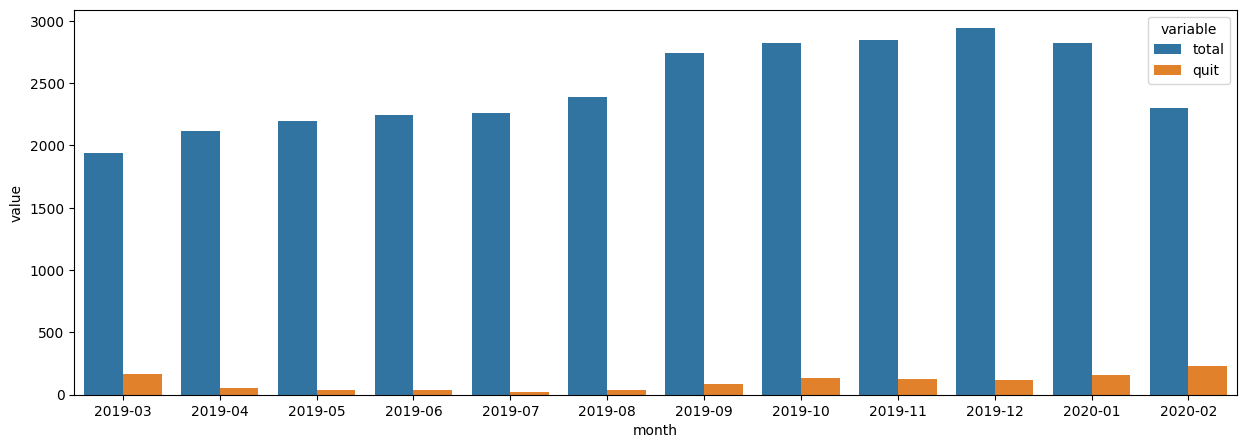

In [67]:
fig, ax=plt.subplots(figsize=(15, 5))
sns.barplot(q_t.melt(id_vars = ['month']), x= 'month', y='value', hue='variable')